### Getting data from yann lecunn dataset

Yann Lecunn dataset is of the format idx and split across 4 files
1. train-images.idx3-ubyte : training image set which consists of 60000 images each image is represented by a 28*28 array
2. train-labels.idx1-ubyte : training label set which consists of 60000 labels 
3. t10k-images.idx3-ubyte : test image set which consists of 10000 images each image is represented by a 28*28
4. t10k-labels.idx1-ubyte : training label set which consists of 10000 labels

In [1]:
import idx2numpy
import seaborn as sns

#### Extract Training data

In [2]:
X_train_3D = idx2numpy.convert_from_file('train-images.idx3-ubyte')
X_train = X_train_3D.flatten().reshape(60000,784)

y_train = idx2numpy.convert_from_file('train-labels.idx1-ubyte')

In [3]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
X_train.shape

(60000, 784)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
y_train.shape

(60000,)

#### Extract Test data

In [7]:
X_test_3D = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
X_test =  X_test_3D.flatten().reshape(10000,784)

y_test = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

In [8]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
X_test.shape

(10000, 784)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
y_test.shape

(10000,)

#### Function to display a digit image from one 1-d representation of pixels

In [12]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def display(image,label):
    """image is a 1*784 numpy array"""
   
    image = image.reshape(28,28)
    sns.heatmap(image,linewidth=0,xticklabels=False,yticklabels=False)
    #plt.imshow(image, cmap = plt.cm.gray_r, interpolation="nearest")
    plt.title("Image Representation for %d" %(label))
    plt.show()

##### Displaying a set of digits

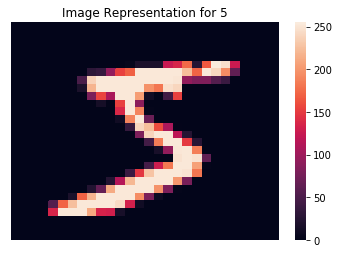

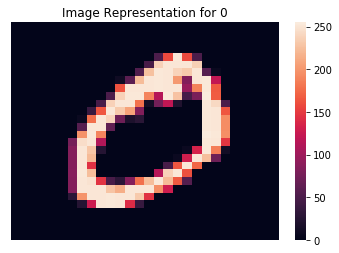

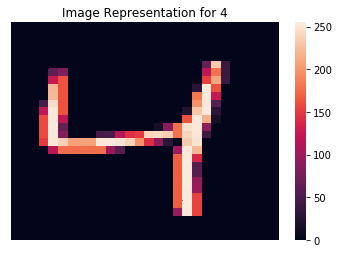

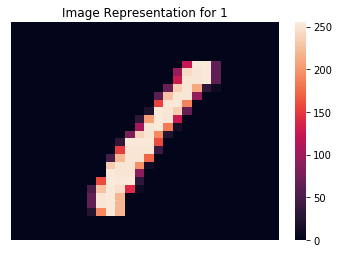

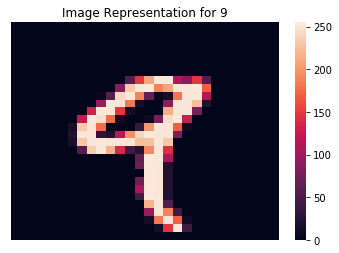

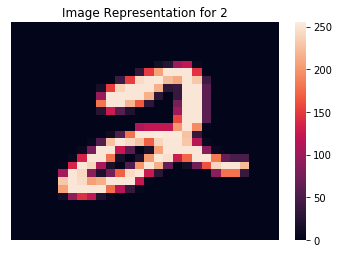

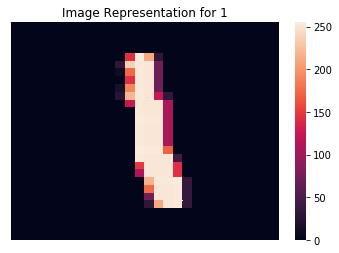

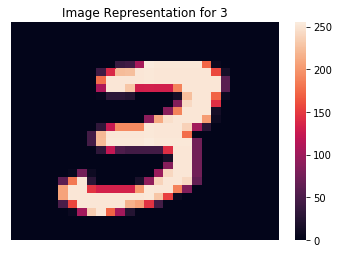

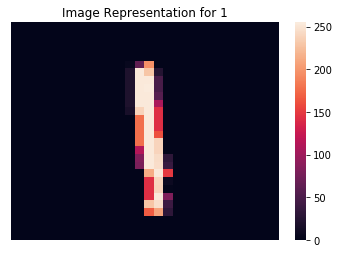

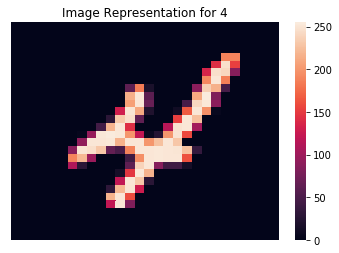

In [13]:
for i in range(10):
    display(X_train[i],y_train[i])

# RBF classifier

In [14]:
X_train = X_train/255
X_test = X_test/255


In [17]:
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC

clf = SVC(max_iter = 500, gamma= 0.001, kernel='rbf')

y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)

clf.fit(X_train, y_train)

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=500, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

##### Calculate Cross Validation Score

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


array([ 0.8724755 ,  0.88304415,  0.85747862])

y_train_pred is the predicted values in the train set such that the model has never seen the data before

In [18]:
y_train_pred

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [19]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

**Create a confusion matrix for cross validation prediction & actual labels**

In [20]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_train, y_train_pred)

In [21]:
confusionMatrix

array([[5777,    1,   16,    7,   14,   25,   28,    2,   45,    8],
       [   1, 6591,   33,   13,    2,   21,    6,    4,   49,   22],
       [  46,   39, 5404,   56,   73,   22,   98,   53,  131,   36],
       [  24,   60,  107, 4938,    1,  580,   25,   35,  303,   58],
       [  12,   25,   41,    1, 3527,    3,   39,    2,   15, 2177],
       [  55,   88,   28,   53,   37, 4790,  113,    3,  220,   34],
       [  33,   19,   29,    0,   27,   50, 5728,    0,   29,    3],
       [  16,   92,  112,   24,   73,   23,    0, 4465,   12, 1448],
       [  16,  109,   46,   36,   32,   74,   48,   11, 5385,   94],
       [  29,   28,   25,   61,   35,   33,    2,   29,   52, 5655]], dtype=int64)

**Plot the Confusion matrix showing the diagonals.**

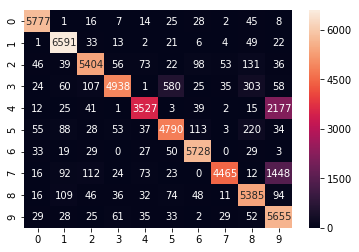

In [22]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [23]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

In [24]:
import numpy as np
#import seaborn as sns
np.fill_diagonal(norm_conf_mx, 0)

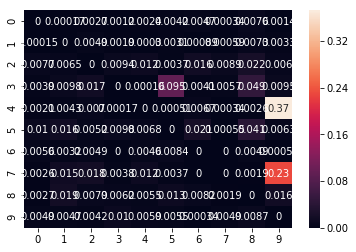

In [25]:
ax = sns.heatmap(norm_conf_mx,annot=True)

**Plot Confusion Matrix against Test data**

In [26]:
y_test_pred = clf.predict(X_test)
y_test_pred

array([7, 2, 1, ..., 9, 8, 6], dtype=uint8)

In [27]:
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 968,    0,    0,    0,    0,    2,    5,    0,    4,    1],
       [   0, 1111,    0,    4,    0,    0,    4,    0,   15,    1],
       [  12,    4,  909,   14,    9,    0,   19,    7,   51,    7],
       [   3,    2,   13,  730,    0,   90,    6,    5,  132,   29],
       [   2,    1,    6,    0,  385,    0,   10,    0,    3,  575],
       [   9,   11,    1,   11,   10,  678,   26,    1,  131,   14],
       [   8,    3,    3,    0,    4,    3,  934,    0,    3,    0],
       [   2,   19,   22,    5,    8,    0,    0,  439,    7,  526],
       [   5,    4,    2,    6,    4,    4,   13,    3,  900,   33],
       [   9,    7,    1,    3,    2,    1,    1,    4,    8,  973]], dtype=int64)

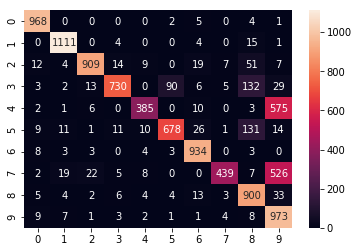

In [28]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [29]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

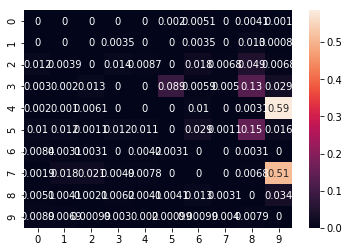

In [30]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.80269999999999997